In [3]:
# modules to import
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import ConnectionPatch

"""
transformation visualization interface.
"""
def transform_visualization(feature_input_s, transform_matrix = None, labels = None, connection = False, *, 
        fig_size = (6, 6), 
        tick_labelsize = 9,
        spine_visible = False,
        markersize = 3
    ):
    """
    :param feature_input_s:
        any 2d sequence type. the data structure is supposed to hold a numpy-style, i.e. row # corresponds \
        to sample size and col # corresponds to feature dimension.
    :param transform_matrix:
        any 2d sequence type. Note that the element of this param can be a function, which is acted on the \
        `feature_input` as a whole (actually this is so-called vector-valued function in this case, which can be viewed as a \
        general form of parametric equations). Only visualize the `feature_input_s` if None.
    """
    feature_input_s = np.array(feature_input_s)
    # `sampling_size` should be a number which can be rooting to a natural number.
    sampling_size = len(feature_input_s)
    
    # 'callable()' returns True denotes the element data type is a function object here.
    if transform_matrix and callable(transform_matrix[0][0]):
        vector_valued_function = np.array(transform_matrix).reshape(-1)        
        feature_output_s_collector = []
        
        # here, `feature_function` receives a vector and gives a scalar.
        for feature_input in feature_input_s:
            feature_output_s_collector.append([
                feature_function(*feature_input) for feature_function in vector_valued_function
            ])
        feature_output_s = [np.array(feature_output_s_collector)]
    elif transform_matrix:
        feature_output_s = [feature_input_s.dot(transform_matrix)]
    else:
        feature_output_s = []
        
# print(feature_output_s)
            
    # plotting
    def feature_format_conversion(feature_s_all_phase):
        # set lim range here!
        nonlocal lim_x, lim_y
        
        if feature_s_all_phase.shape[1] == 1:
            x_coordinates = np.array([0] * feature_s_all_phase.shape[0])
        elif feature_s_all_phase.shape[1] == 2:
            x_coordinates = feature_s_all_phase[:, 0]
            if lim_x[0] is None or lim_x[0] > min(x_coordinates): lim_x[0] = min(x_coordinates)                
            if lim_x[1] is None or lim_x[1] < max(x_coordinates): lim_x[1] = max(x_coordinates)
        y_coordinates = feature_s_all_phase[:, -1]
        if lim_y[0] is None or lim_y[0] > min(y_coordinates): lim_y[0] = min(y_coordinates)                
        if lim_y[1] is None or lim_y[1] < max(y_coordinates): lim_y[1] = max(y_coordinates)
        if sampling_size_per_dimension.is_integer():
            _ = int(sampling_size_per_dimension), int(sampling_size_per_dimension)
            return x_coordinates, y_coordinates
# return x_coordinates.reshape(_), y_coordinates.reshape(_)
        else:
            return x_coordinates, y_coordinates
    
    quantity_of_col = 2 if transform_matrix else 1
    fig, axes = plt.subplots(
        nrows = 1, ncols = quantity_of_col,
        figsize = (fig_size[0]*quantity_of_col, fig_size[1])
    )
    
    feature_s_all_phase = [feature_input_s] + feature_output_s
    axes = np.array(axes).reshape(-1)
    sampling_size_per_dimension = sampling_size ** (1/2)
    lim_x, lim_y = [[None, None]] * 2
    coordinates_all_phase = [feature_format_conversion(_) for _ in feature_s_all_phase]
    
    for i, ax in enumerate(axes):
        ax.tick_params(labelsize=tick_labelsize)
        for spine in ax.spines.values(): spine.set_visible(spine_visible)
        if labels is None:
            artist = ax.plot(*coordinates_all_phase[i], 'yo', markersize=markersize, zorder=5)
        elif (labels is not None) and sampling_size_per_dimension.is_integer():
            # the inputs (X, Y, C) of `pcolormesh` must be a 2-D array.
            # alternatives to `pcolormesh`: using plot twice with their directions mutually perpendicular.
            artist = ax.tripcolor(
                *coordinates_all_phase[1],
                labels,
# labels.reshape(int(sampling_size_per_dimension), int(sampling_size_per_dimension)),
                #cmap='RdBu_r', #facecolor='none', edgecolor='k', alpha=0.1 
            )
    
    if connection:
        coordinates_all_phase_ = np.array(coordinates_all_phase).reshape(2, 2, -1)
        for i in range(sampling_size):
            if i % 1 == 0:
                # 0-th phase | x-coordinates | i-th sample
                pointA = coordinates_all_phase_[0][0][i], coordinates_all_phase_[0][1][i]
                pointB = coordinates_all_phase_[1][0][i], coordinates_all_phase_[1][1][i]
        # print(pointA, pointB)
                # `axesB` is the first one.
                con = ConnectionPatch(xyA=pointB, xyB=pointA, 
                                  coordsA='data', coordsB='data', 
                                  arrowstyle='<-',
                                  axesA=axes[1], axesB=axes[0],
                                  linewidth=0.5,
                                  color='r'
                )

    # using `plt.xlim` will cause some weird problems in matplotlib-2.x.x.
    for ax in axes: ax.set(xlim=lim_x, ylim=lim_y)
    plt.show()


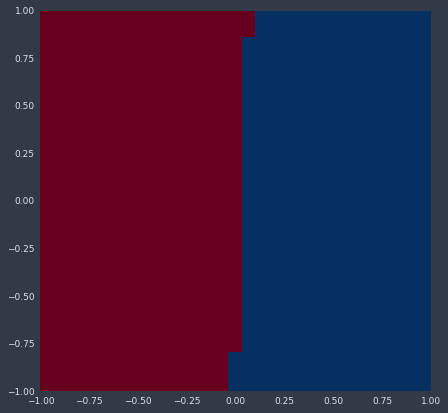

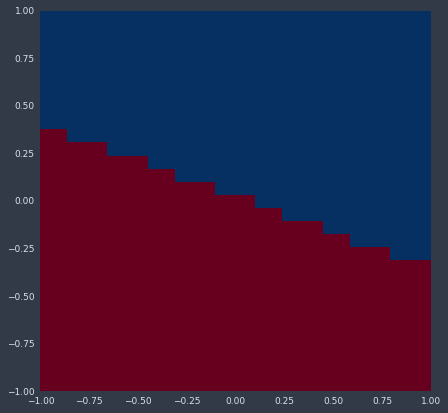

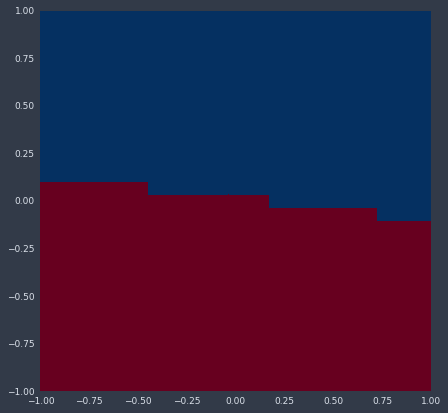

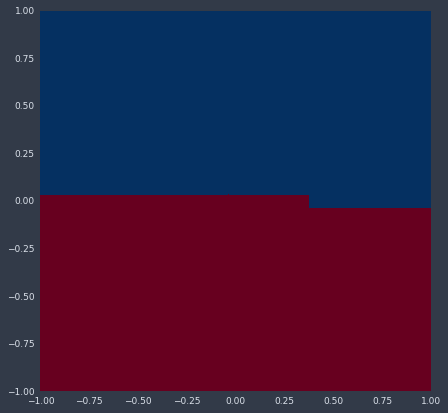

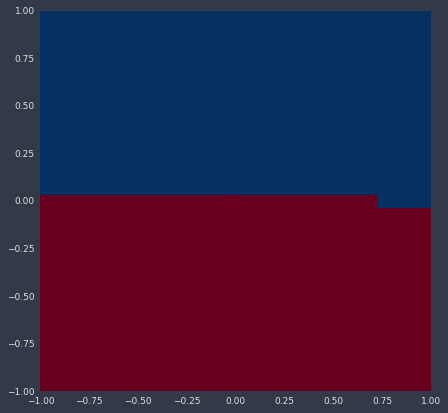

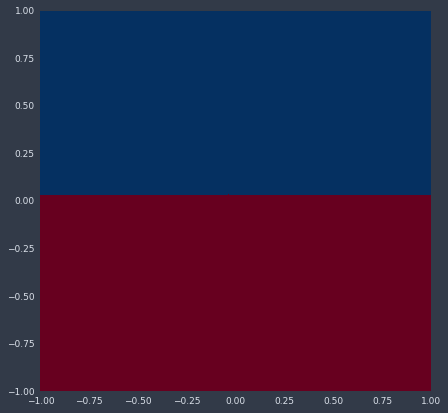

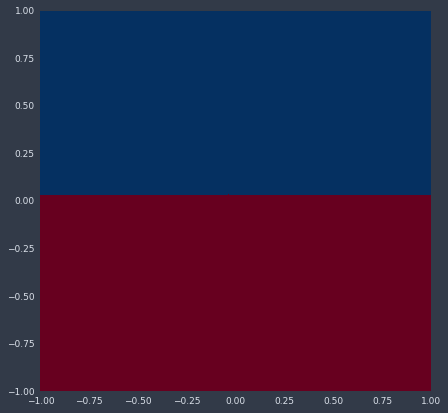

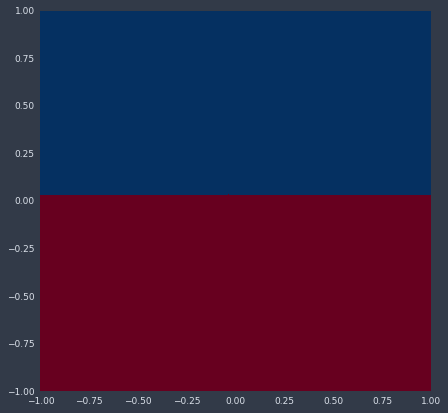

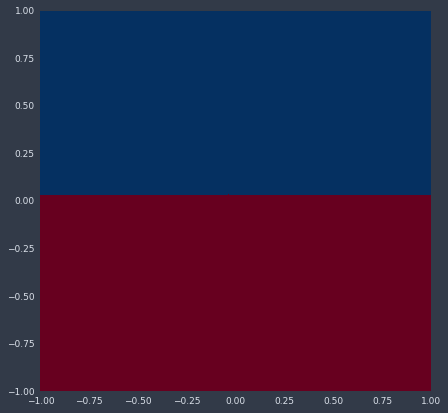

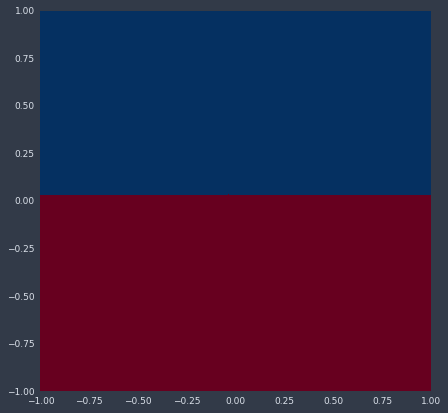

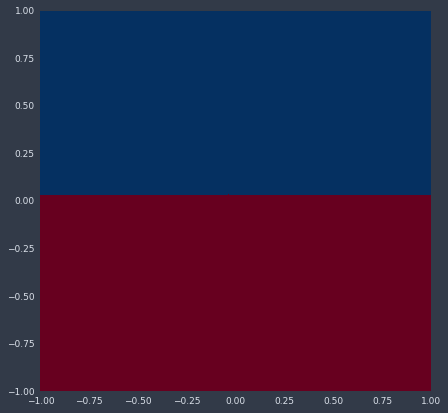

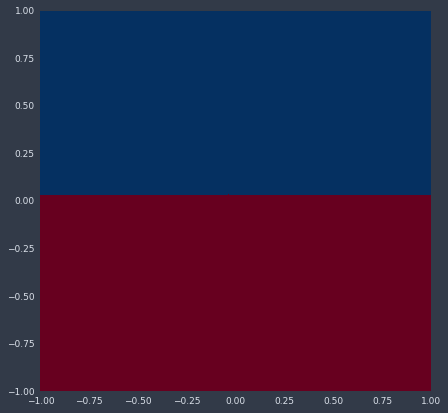

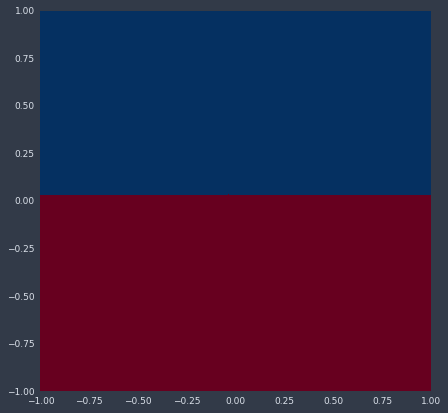

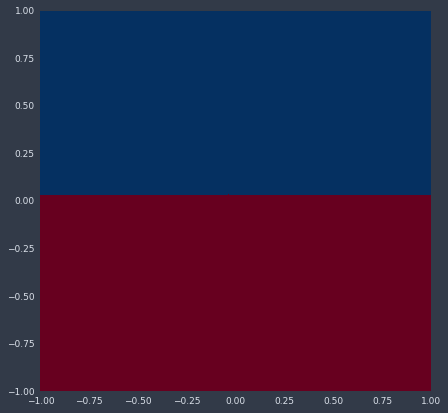

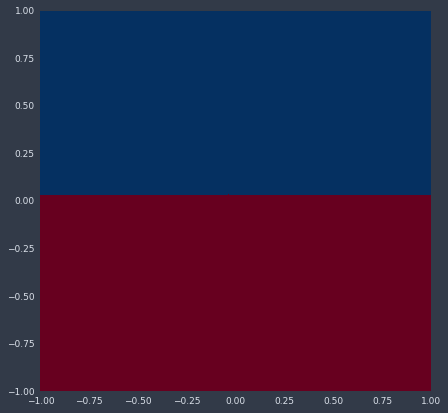

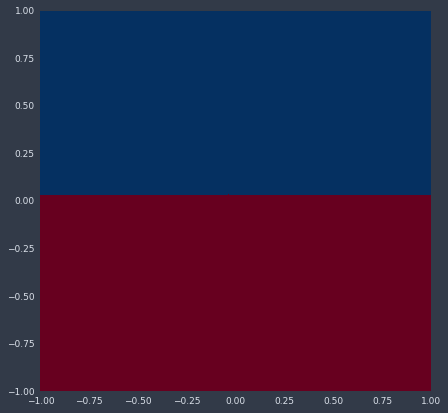

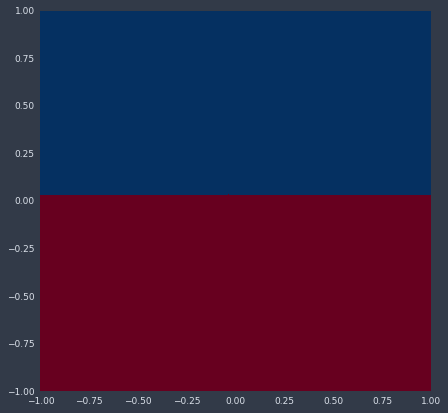

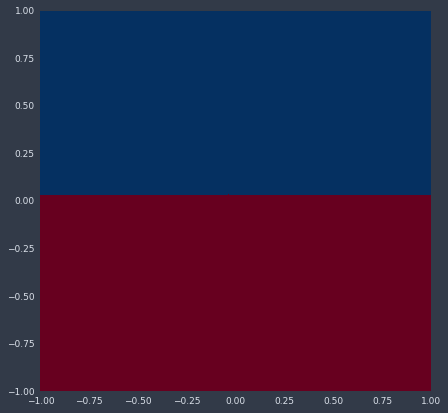

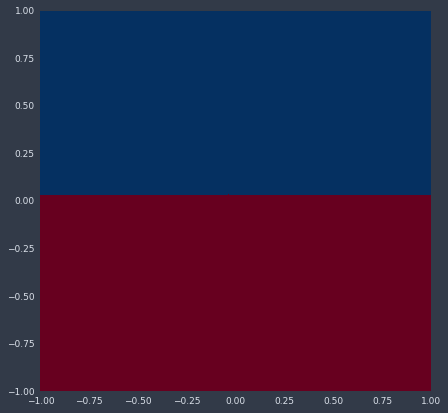

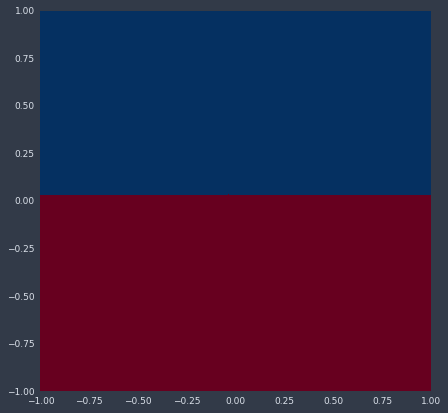

In [72]:
# # xs sampled to draw the decision boundary of NN.
# sampling_scale = 30
# x_1_sampled_range = x_2_sampled_range = np.linspace(-1, 1, sampling_scale)
# x_s_sampled = np.column_stack([
#     np.repeat(x_1_sampled_range, len(x_2_sampled_range)),
#     np.tile(x_2_sampled_range, len(x_1_sampled_range))
# ])

# custom_params = dict()

# for i in range(0, 1000, 50):
#     custom_params['W'] = W_trace[i]
#     custom_params['b'] = b_trace[i]
#     predict = nn.predict(x_s_sampled, custom_params)
#     artist = transform_visualization(
#         x_s_sampled, 
#         labels=predict
#     )
# # plt.gca().remove(artist)

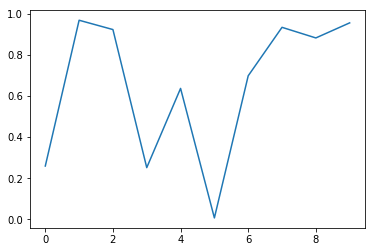

In [4]:
# fig, ax = plt.subplots()
# ax.plot(np.random.rand(10))

# def onclick(event):
#     print('%s click: button=%d, x=%d, y=%d, xdata=%f, ydata=%f' %
#           ('double' if event.dblclick else 'single', event.button,
#            event.x, event.y, event.xdata, event.ydata))

# cid = fig.canvas.mpl_connect('button_press_event', onclick)
# plt.show()
# %matplotlib notebook
# import numpy as np
# import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.random.rand(10))
text=ax.text(0,0, "", va="bottom", ha="left")

def onclick(event):
    tx = 'button=%d, x=%d, y=%d, xdata=%f, ydata=%f' % (event.button, event.x, event.y, event.xdata, event.ydata)
    text.set_text(tx)

cid = fig.canvas.mpl_connect('button_press_event', onclick)

In [ ]:
# assume X, Y is sorted from small to large, then: direction of X, Y: ↑ ↑ ↑
# direction of Z: each element in Z corresponds to the direction of X, Y
# data = (
#     x_s_sampled[:, 0].reshape(sampling_scale, sampling_scale), 
#     x_s_sampled[:, 1].reshape(sampling_scale, sampling_scale), 
#     predict.reshape(sampling_scale, sampling_scale)
# )

# when X, Y are 1D, contour locates these grids first, and draw their intensities from \
# top-left to bottom-right using values of Z in turn.
# this calling style may be confusing, so please avoid it.
# data = (
#     x_1_sampled_range, 
#     x_2_sampled_range, 
#     predict.reshape(30, 30)
# )

# red corresponds to `upper blue curve` class, blue corresponds to `lower red curve` class.
# value closes to 1 corresponds to `lower red curve` class.
# cs = ax.contourf(*data, levels=1, cmap='RdBu_r', alpha=1)
# cs2 = ax.contour(*data, levels=2)
# ax.clabel(cs2, fmt = '%2.1f', fontsize=14)
# ax.plot()

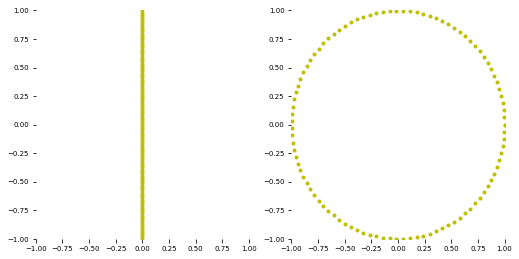

In [5]:
"""
transformation 1: space bending from 1-d line to 2-d circle spaces.
"""

sampling_size = 100
feature_input_s = np.linspace(-1, 1, sampling_size).reshape(-1, 1)
transform_matrix = [
    [lambda x: np.cos(np.pi*x + np.pi), 
     
     lambda x: -np.sin(np.pi*x + np.pi)]
]

transform_visualization(feature_input_s, transform_matrix, connection=True, fig_size=(4.2,4.2), tick_labelsize=7)

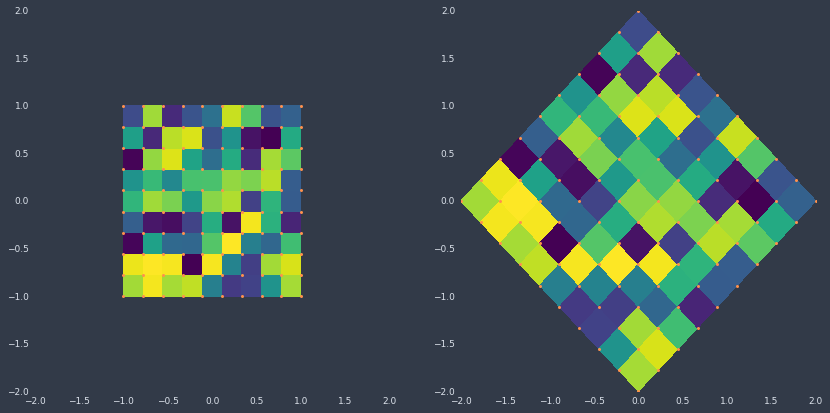

In [18]:
"""
transformation 2: linear transformation within 2-d spaces.
"""

sampling_size = 10
feature_input_s = np.column_stack([
    np.repeat(np.linspace(-1, 1, sampling_size), sampling_size),
    np.tile(np.linspace(-1, 1, sampling_size), sampling_size),
])
transform_matrix = [
    [1, -1],
    [1, 1]
]
label = np.random.random((feature_input_s.shape[0], 1))

transform_visualization(feature_input_s, transform_matrix, label)

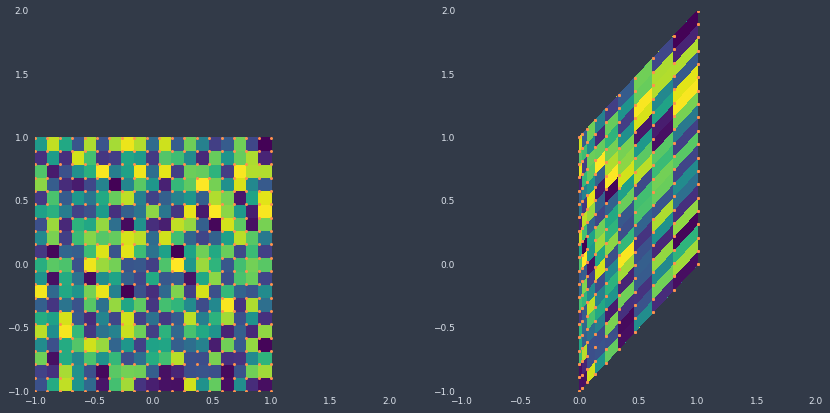

In [20]:
"""
transformation 3: non-linear transformation within 2-d spaces.
"""

sampling_size = 20
feature_input_s = np.column_stack([
    np.repeat(np.linspace(-1, 1, sampling_size), sampling_size),
    np.tile(np.linspace(-1, 1, sampling_size), sampling_size),
])
transform_matrix = [
    [lambda x_1, x_2: x_1 ** 2,
     lambda x_1, x_2: x_1 ** 2 + x_2]
]
label = np.random.random((feature_input_s.shape[0], 1))

transform_visualization(feature_input_s, transform_matrix, label)

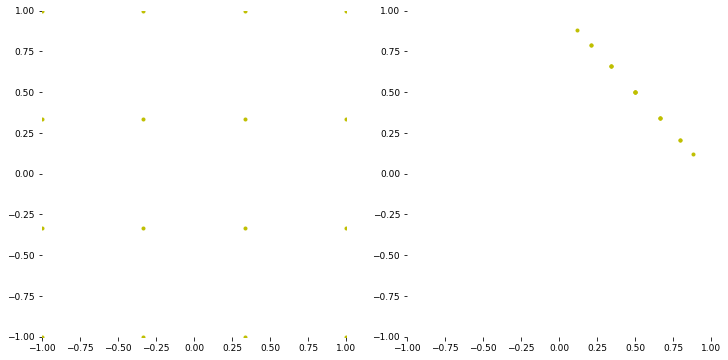

In [6]:
"""
transformation 3: non-linear transformation within 2-d spaces.
"""

sampling_size = 4
feature_input_s = np.column_stack([
    np.repeat(np.linspace(-1, 1, sampling_size), sampling_size),
    np.tile(np.linspace(-1, 1, sampling_size), sampling_size),
])
transform_matrix = [
    [lambda x_1, x_2: np.exp(x_1) / (np.exp(x_1) + np.exp(x_2)),
     lambda x_1, x_2: np.exp(x_2) / (np.exp(x_1) + np.exp(x_2))]
]
label = np.random.random((feature_input_s.shape[0], 1))

transform_visualization(feature_input_s, transform_matrix, connection=True)
pass

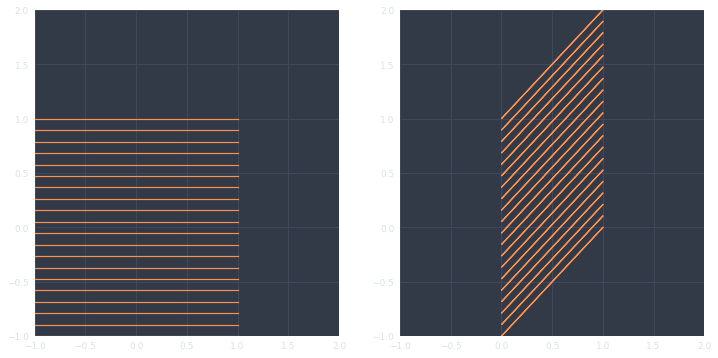

In [12]:
%matplotlib inline
"""
transformation 3: non-linear transformation within 2-d spaces.
"""

sampling_size = 20
feature_input_s = np.column_stack([
    np.repeat(np.linspace(-1, 1, sampling_size), sampling_size),
    np.tile(np.linspace(-1, 1, sampling_size), sampling_size),
])
transform_matrix = [
    [lambda x_1, x_2: x_1 ** 2,
     lambda x_1, x_2: x_1 ** 2 + x_2]
]
label = np.random.random((feature_input_s.shape[0], 1))

transform_visualization(feature_input_s, transform_matrix, label)

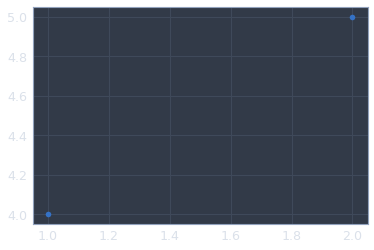